# Import required Libraries

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.datasets import get_rdataset

# Get the AirPassengers dataset from R datasets

In [19]:
air_passengers = get_rdataset("AirPassengers", package="datasets").data

# Convert to pandas time series


In [20]:
ts_data = pd.Series(air_passengers["value"].values, 
                    index=pd.date_range(start='1949-01-01', 
                                       periods=len(air_passengers), 
                                       freq='M'))

/var/folders/rv/7k63c71j1f57_q_npvwwsjp00000gn/T/ipykernel_5678/3855814798.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  index=pd.date_range(start='1949-01-01',


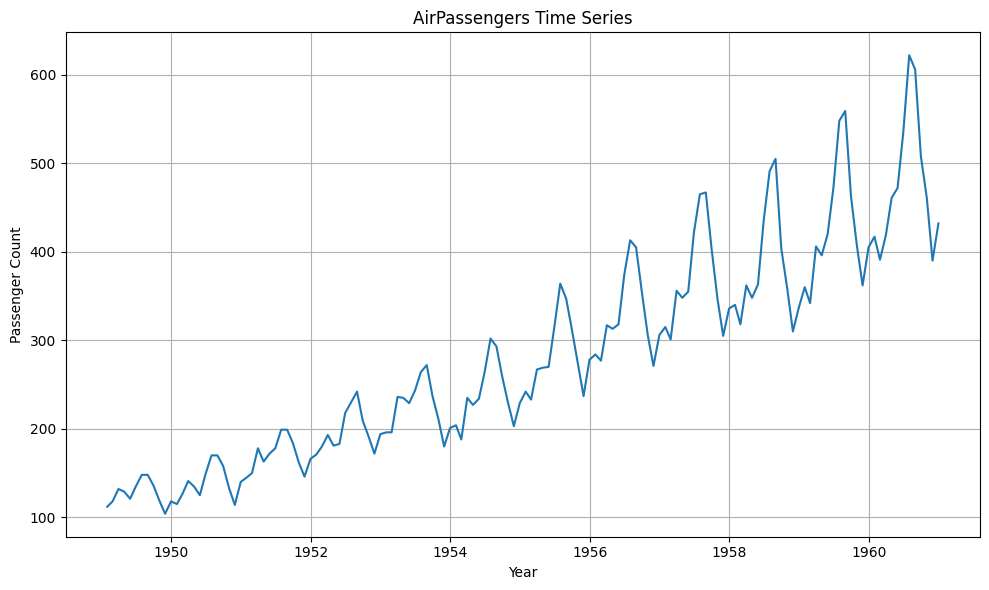

In [21]:
# Plot the time series
plt.figure(figsize=(10, 6))
plt.plot(ts_data)
plt.title("AirPassengers Time Series")
plt.xlabel("Year")
plt.ylabel("Passenger Count")
plt.grid(True)
plt.tight_layout()
plt.show()

 # Fit Exponential Smoothing Models

## Simple Exponential Smoothing (SES) with different alpha values

/Users/marwen/Desktop/timeserie/venv/lib/python3.12/site-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/Users/marwen/Desktop/timeserie/venv/lib/python3.12/site-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/Users/marwen/Desktop/timeserie/venv/lib/python3.12/site-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/Users/marwen/Desktop/timeserie/venv/lib/python3.12/site-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


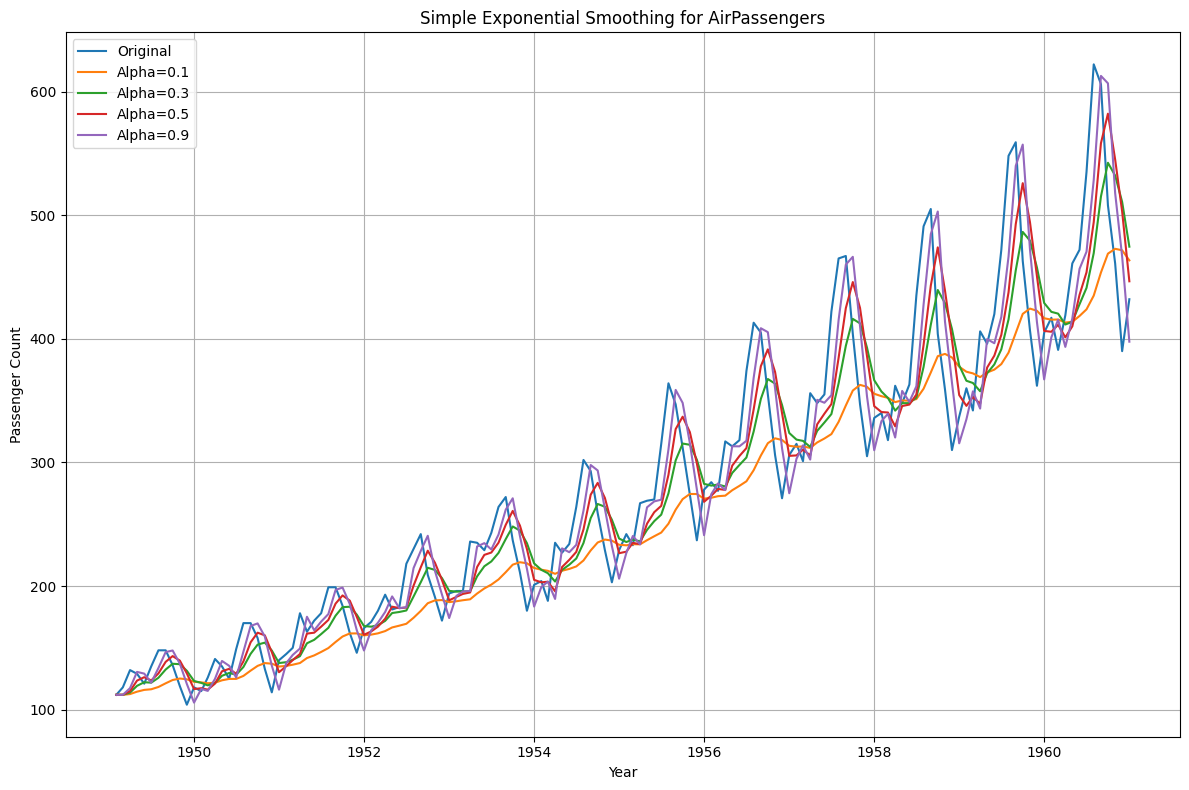

In [22]:
# Import required libraries
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
# Apply Simple Exponential Smoothing with different alpha values
plt.figure(figsize=(12, 8))

# Plot original data
plt.plot(ts_data, label='Original')

# Try different smoothing levels
alphas = [0.1, 0.3, 0.5, 0.9]
for alpha in alphas:
    # Initialize and fit the model
    model = SimpleExpSmoothing(ts_data).fit(smoothing_level=alpha)
    # Get the fitted/smoothed values
    smoothed_data = model.fittedvalues
    # Plot the smoothed data
    plt.plot(smoothed_data, label=f'Alpha={alpha}')

plt.title('Simple Exponential Smoothing for AirPassengers')
plt.xlabel('Year')
plt.ylabel('Passenger Count')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Holt’s Linear Trend Model

/Users/marwen/Desktop/timeserie/venv/lib/python3.12/site-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/Users/marwen/Desktop/timeserie/venv/lib/python3.12/site-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/Users/marwen/Desktop/timeserie/venv/lib/python3.12/site-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


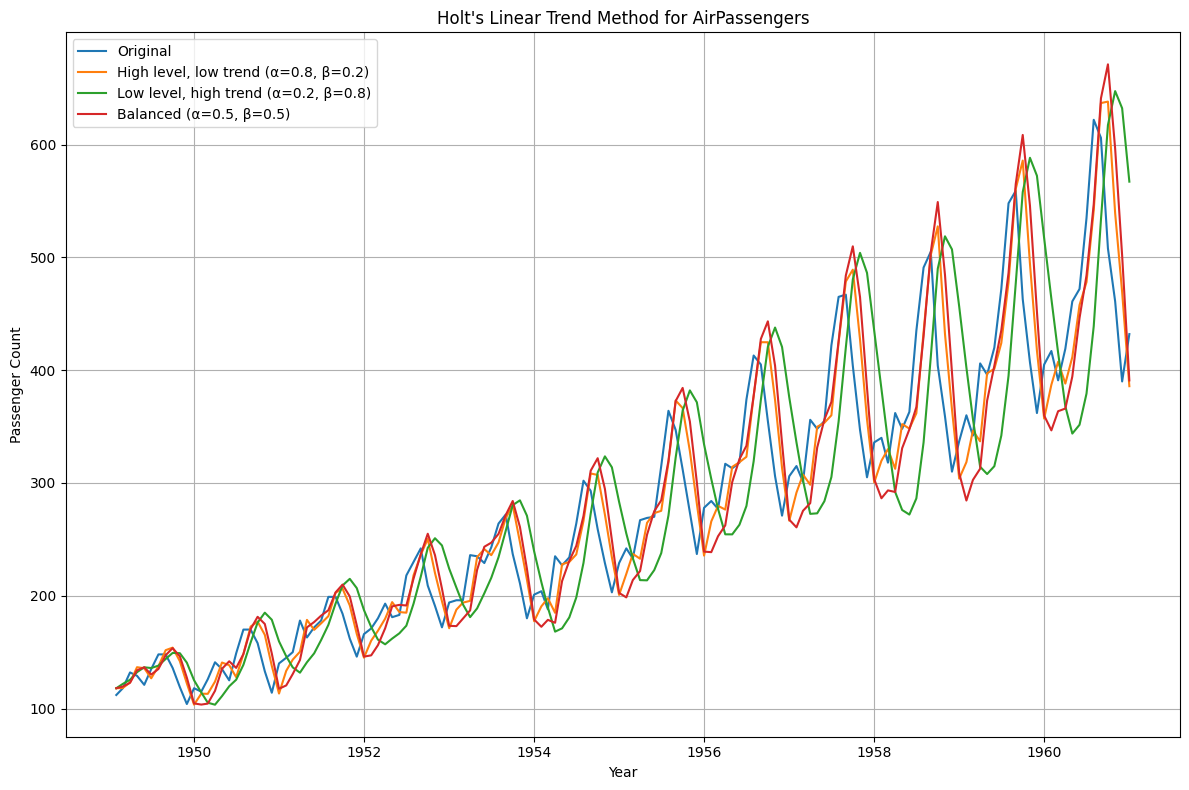

In [23]:
# Import required libraries
from statsmodels.tsa.holtwinters import Holt

# Apply Holt's Linear Trend method with different parameter combinations
plt.figure(figsize=(12, 8))

# Plot original data
plt.plot(ts_data, label='Original')

# Try different smoothing parameters
parameter_combinations = [
    (0.8, 0.2, "High level, low trend"),
    (0.2, 0.8, "Low level, high trend"),
    (0.5, 0.5, "Balanced")
]

for alpha, beta, label in parameter_combinations:
    # Initialize and fit the model
    model = Holt(ts_data).fit(smoothing_level=alpha, smoothing_trend=beta)
    # Get the fitted values
    fitted_values = model.fittedvalues
    # Plot the fitted data
    plt.plot(fitted_values, label=f'{label} (α={alpha}, β={beta})')

plt.title("Holt's Linear Trend Method for AirPassengers")
plt.xlabel('Year')
plt.ylabel('Passenger Count')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Holt-Winters Seasonal Model

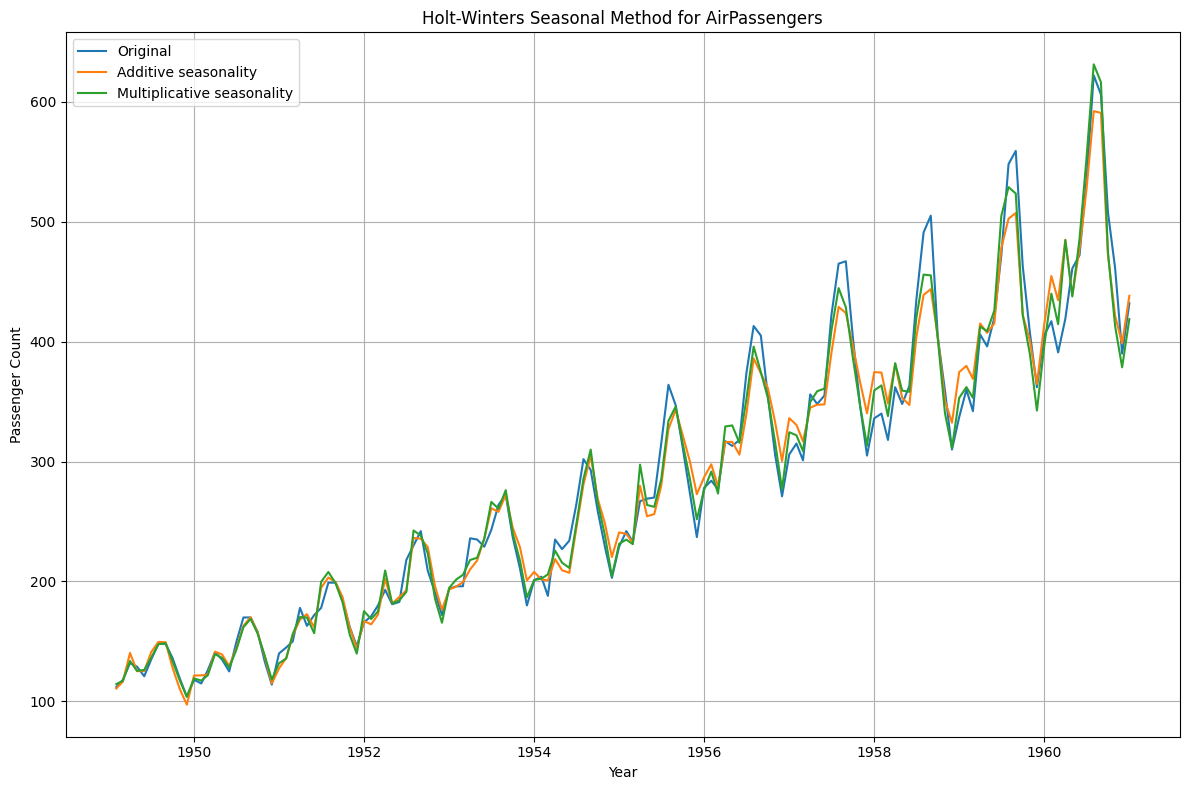

In [24]:
# Import required libraries
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Apply Holt-Winters Seasonal Model
plt.figure(figsize=(12, 8))

# Plot original data
plt.plot(ts_data, label='Original')

# Define seasonal period (12 months for monthly data)
seasonal_periods = 12

# Try different seasonal methods
seasonal_types = [
    ('add', 'Additive seasonality'),
    ('mul', 'Multiplicative seasonality')
]

for seasonal_type, label in seasonal_types:
    # Initialize and fit the model
    model = ExponentialSmoothing(
        ts_data,
        trend='add',                   # additive trend
        seasonal=seasonal_type,        # additive or multiplicative seasonality
        seasonal_periods=seasonal_periods
    ).fit(
        smoothing_level=0.6,           # alpha (level)
        smoothing_trend=0.2,           # beta (trend)
        smoothing_seasonal=0.6,        # gamma (seasonal)
        optimized=False
    )
    
    # Get the fitted values
    fitted_values = model.fittedvalues
    
    # Plot the fitted data
    plt.plot(fitted_values, label=f'{label}')

plt.title("Holt-Winters Seasonal Method for AirPassengers")
plt.xlabel('Year')
plt.ylabel('Passenger Count')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Fit the ETS Model

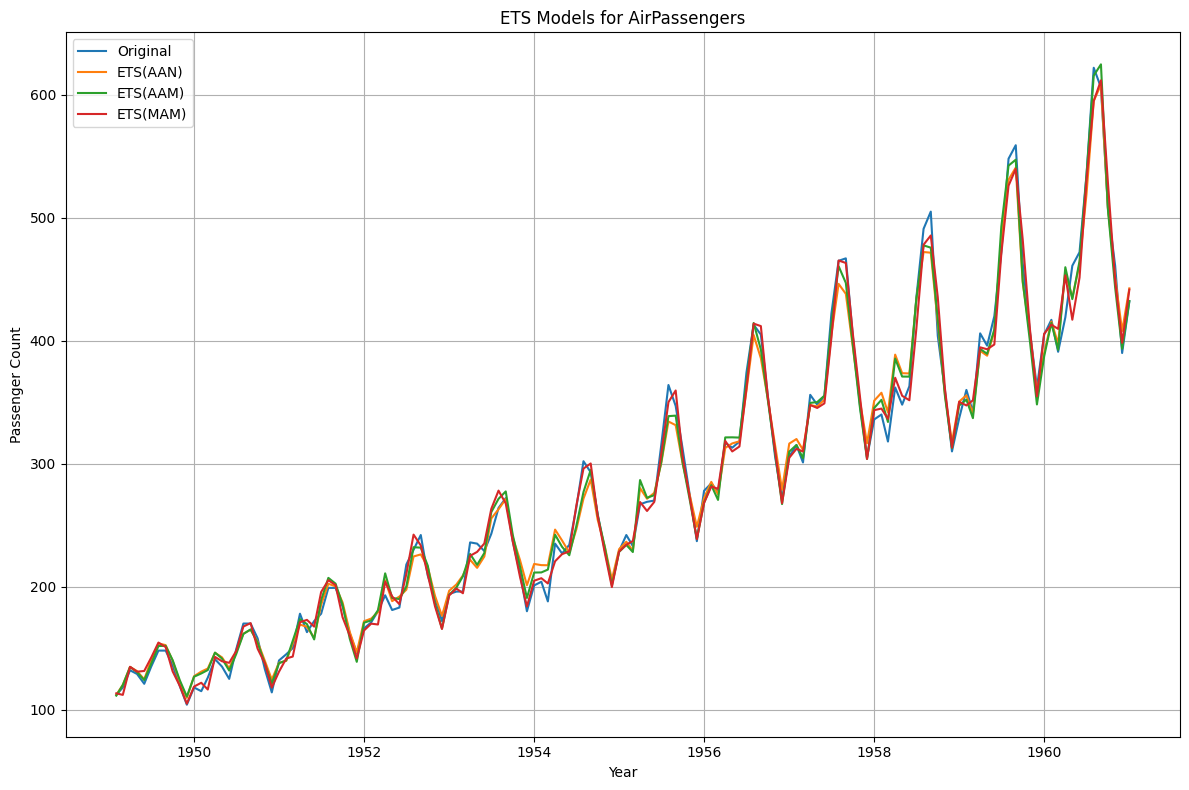

In [25]:
# Import required libraries
from statsmodels.tsa.exponential_smoothing.ets import ETSModel

# Apply different ETS models
plt.figure(figsize=(12, 8))

# Plot original data
plt.plot(ts_data, label='Original')

# Define different ETS models to try
ets_models = [
    ('add', 'add', 'add', 'AAN'),  # Additive error, Additive trend, None seasonal
    ('add', 'add', 'mul', 'AAM'),  # Additive error, Additive trend, Multiplicative seasonal
    ('mul', 'add', 'mul', 'MAM')   # Multiplicative error, Additive trend, Multiplicative seasonal
]

# Fit each model
for error, trend, seasonal, label in ets_models:
    # For AirPassengers, we need seasonal with period=12
    model = ETSModel(
        ts_data,
        error=error,
        trend=trend,
        seasonal=seasonal,
        seasonal_periods=12 if seasonal != 'none' else None,
        damped_trend=False
    )
    
    # Fit the model
    fit_model = model.fit(disp=False)
    
    # Get fitted values
    fitted_values = fit_model.fittedvalues
    
    # Plot the fitted data
    plt.plot(fitted_values, label=f'ETS({label})')
    

plt.title("ETS Models for AirPassengers")
plt.xlabel('Year')
plt.ylabel('Passenger Count')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Forecasting with the ETS Model


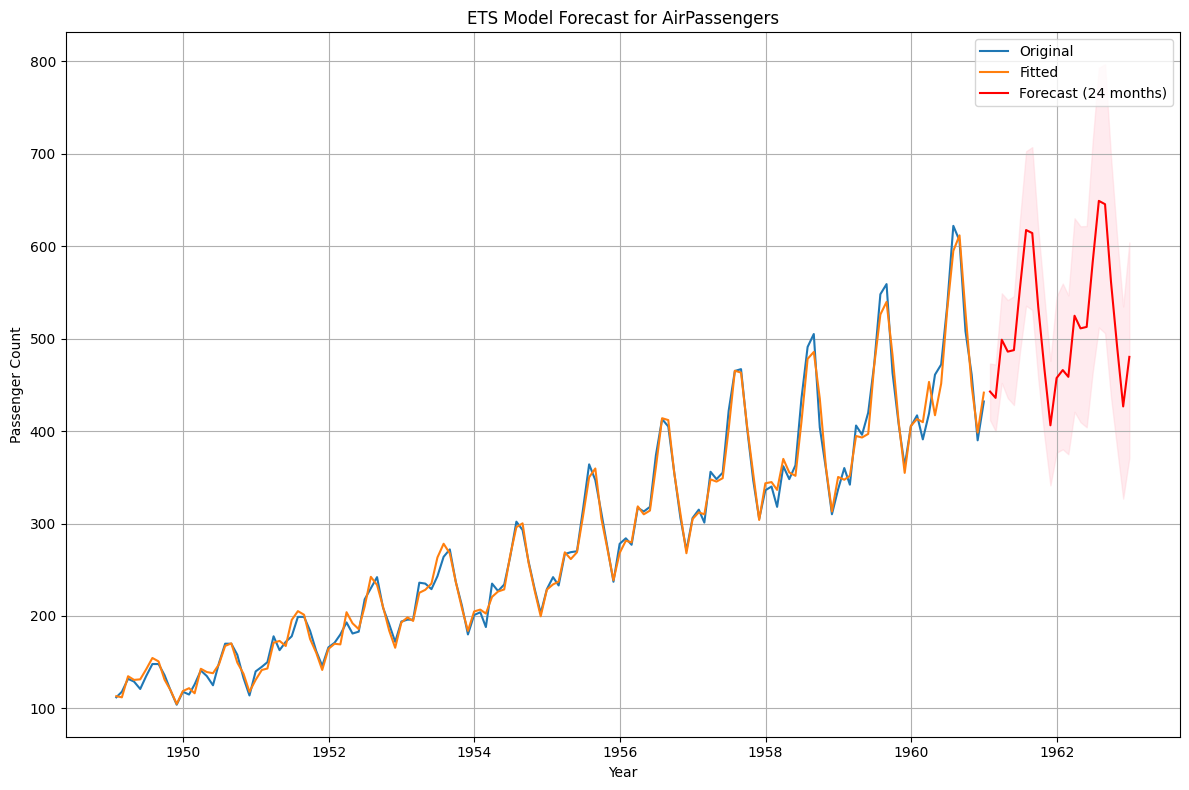

In [26]:
# Select the best model (usually multiplicative error/seasonal for this dataset)
best_model = ETSModel(
    ts_data,
    error='mul',
    trend='add',
    seasonal='mul',
    seasonal_periods=12,
    damped_trend=False
)

# Fit the model
fitted_model = best_model.fit(disp=False)

# Make forecasts
forecast_horizon = 24
forecast = fitted_model.forecast(forecast_horizon)

# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(ts_data, label='Original')
plt.plot(fitted_model.fittedvalues, label='Fitted')
plt.plot(forecast, label='Forecast (24 months)', color='red')

# Add prediction intervals
pred_int = fitted_model.get_prediction(start=len(ts_data), end=len(ts_data)+forecast_horizon-1)
pred_int_df = pred_int.summary_frame(alpha=0.05)

# Plot prediction intervals
plt.fill_between(
    pred_int_df.index,
    pred_int_df['pi_lower'],
    pred_int_df['pi_upper'],
    color='pink', alpha=0.3
)

plt.title("ETS Model Forecast for AirPassengers")
plt.xlabel('Year')
plt.ylabel('Passenger Count')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Model Evaluation and Summary

In [27]:
# Print model summary
print(fitted_model.summary())

# Calculate error metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate error metrics
mse = mean_squared_error(ts_data, fitted_model.fittedvalues)
rmse = np.sqrt(mse)
mae = mean_absolute_error(ts_data, fitted_model.fittedvalues)

print(f"\nModel Performance Metrics:")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")

# Calculate MAPE (Mean Absolute Percentage Error)
mape = np.mean(np.abs((ts_data - fitted_model.fittedvalues) / ts_data)) * 100
print(f"MAPE: {mape:.2f}%")

# Compare AIC/BIC of different models
print("\nModel Comparison:")
models = {}
for error, trend, seasonal, name in ets_models:
    model = ETSModel(
        ts_data,
        error=error,
        trend=trend,
        seasonal=seasonal,
        seasonal_periods=12 if seasonal != 'none' else None
    ).fit(disp=False)
    models[name] = {'AIC': model.aic, 'BIC': model.bic}
    print(f"ETS({name}) - AIC: {model.aic:.2f}, BIC: {model.bic:.2f}")

                                 ETS Results                                  
Dep. Variable:                      y   No. Observations:                  144
Model:                       ETS(MAM)   Log Likelihood                -522.490
Date:                Fri, 07 Mar 2025   AIC                           1080.980
Time:                        12:16:17   BIC                           1134.436
Sample:                    01-31-1949   HQIC                          1102.702
                         - 12-31-1960   Scale                            0.001
Covariance Type:               approx                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
smoothing_level         0.7410      0.087      8.565      0.000       0.571       0.911
smoothing_trend       7.41e-05        nan        nan        nan         nan         nan
smoothing_season

# Comparing Model Performance and Accuracy


Evaluating SES Models...
Evaluating Holt Models...
Evaluating Holt-Winters Models...
Evaluating ETS Models...


/Users/marwen/Desktop/timeserie/venv/lib/python3.12/site-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/Users/marwen/Desktop/timeserie/venv/lib/python3.12/site-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/Users/marwen/Desktop/timeserie/venv/lib/python3.12/site-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/Users/marwen/Desktop/timeserie/venv/lib/python3.12/site-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/Users/marwen/Desktop/timeserie/venv/lib/python3.12/site-pac


Model Accuracy Comparison:
                                    Model         MSE      RMSE       MAE      MAPE         AIC         BIC
                              SES (α=0.1) 2733.611503 52.283951 37.042407 12.260357         NaN         NaN
                              SES (α=0.3) 2090.284339 45.719628 33.554642 11.244239         NaN         NaN
                              SES (α=0.5) 1729.831233 41.591240 30.849514 10.474247         NaN         NaN
                              SES (α=0.9) 1206.599754 34.736145 26.400885  9.196528         NaN         NaN
             Holt (High level, low trend) 1536.016440 39.192046 29.291722 10.283201         NaN         NaN
             Holt (Low level, high trend) 6453.525871 80.333840 61.531708 20.599249         NaN         NaN
                          Holt (Balanced) 2584.880358 50.841719 38.213881 13.451300         NaN         NaN
      Holt-Winters (Additive seasonality)  416.416113 20.406276 14.887995  4.998216         NaN         NaN


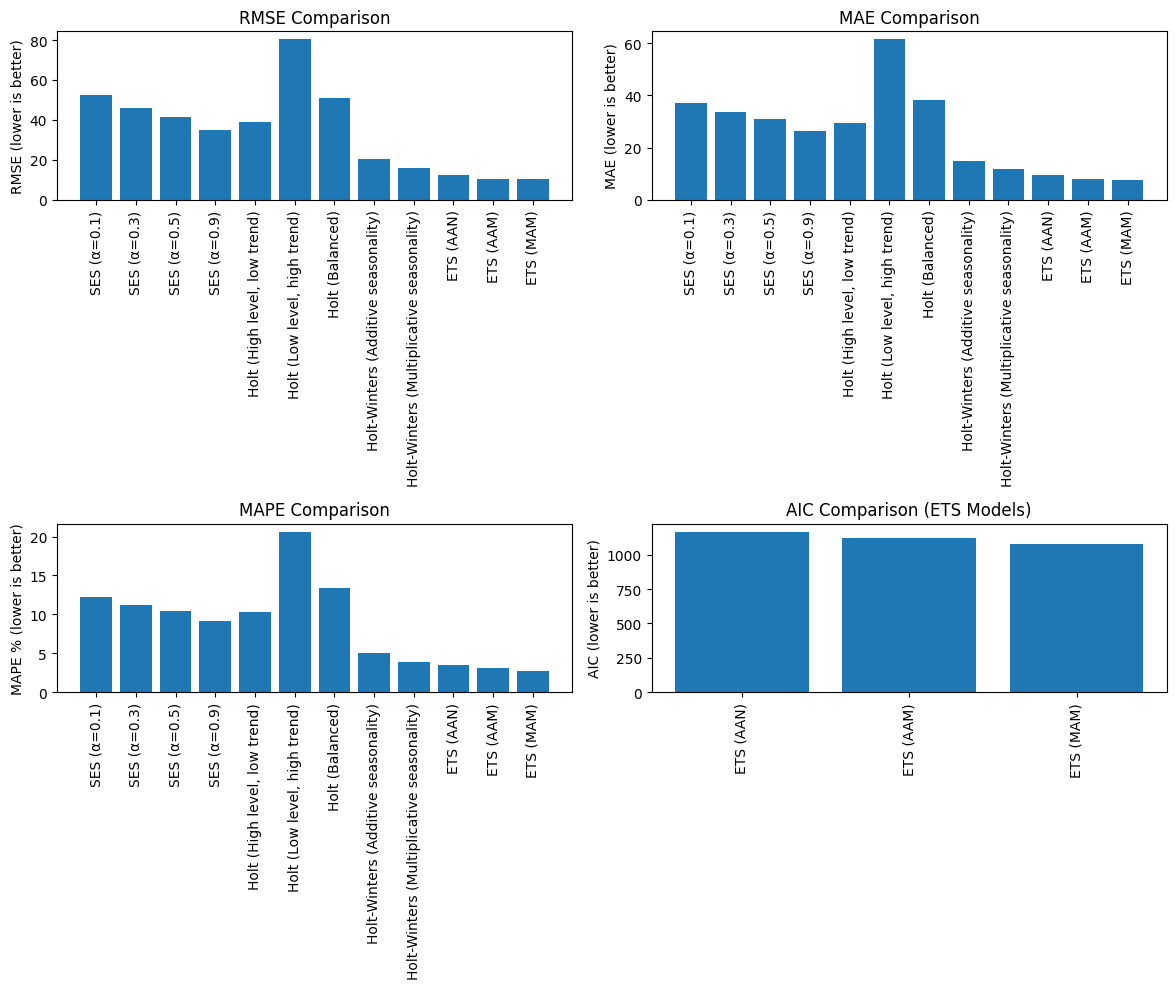


Best Models:
Best by RMSE: ETS (MAM)
Best by MAE: ETS (MAM)
Best by MAPE: ETS (MAM)


In [28]:
# Import necessary libraries for model evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error
import pandas as pd
import numpy as np

# Create a function to calculate common accuracy metrics
def calculate_accuracy_metrics(actual, predicted, model_name):
    """Calculate common accuracy metrics for time series models."""
    mse = mean_squared_error(actual, predicted)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(actual, predicted)
    mape = np.mean(np.abs((actual - predicted) / actual)) * 100
    
    # Return metrics as a dictionary
    return {
        'Model': model_name,
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'MAPE': mape
    }

# Create list to store all accuracy metrics
accuracy_results = []

# 1. Simple Exponential Smoothing (SES) Models
print("Evaluating SES Models...")
for alpha in alphas:
    # Fit the model
    ses_model = SimpleExpSmoothing(ts_data).fit(smoothing_level=alpha)
    # Calculate metrics
    metrics = calculate_accuracy_metrics(ts_data, ses_model.fittedvalues, f"SES (α={alpha})")
    accuracy_results.append(metrics)

# 2. Holt's Linear Trend Models
print("Evaluating Holt Models...")
for alpha, beta, label in parameter_combinations:
    # Fit the model
    holt_model = Holt(ts_data).fit(smoothing_level=alpha, smoothing_trend=beta)
    # Calculate metrics
    metrics = calculate_accuracy_metrics(ts_data, holt_model.fittedvalues, f"Holt ({label})")
    accuracy_results.append(metrics)

# 3. Holt-Winters Seasonal Models
print("Evaluating Holt-Winters Models...")
for seasonal_type, label in seasonal_types:
    # Fit the model
    hw_model = ExponentialSmoothing(
        ts_data,
        trend='add',
        seasonal=seasonal_type,
        seasonal_periods=12
    ).fit(
        smoothing_level=0.6,
        smoothing_trend=0.2,
        smoothing_seasonal=0.6,
        optimized=False
    )
    # Calculate metrics
    metrics = calculate_accuracy_metrics(ts_data, hw_model.fittedvalues, f"Holt-Winters ({label})")
    accuracy_results.append(metrics)

# 4. ETS Models
print("Evaluating ETS Models...")
for error, trend, seasonal, label in ets_models:
    # Fit the model
    ets_model = ETSModel(
        ts_data,
        error=error,
        trend=trend,
        seasonal=seasonal,
        seasonal_periods=12 if seasonal != 'none' else None
    ).fit(disp=False)
    # Calculate metrics
    metrics = calculate_accuracy_metrics(ts_data, ets_model.fittedvalues, f"ETS ({label})")
    # Add AIC and BIC
    metrics['AIC'] = ets_model.aic
    metrics['BIC'] = ets_model.bic
    accuracy_results.append(metrics)

# Convert results to DataFrame for easier comparison
accuracy_df = pd.DataFrame(accuracy_results)

# Display results
print("\nModel Accuracy Comparison:")
print(accuracy_df.to_string(index=False))

# Visualize accuracy comparison
plt.figure(figsize=(12, 10))

# Create bar plots for RMSE
plt.subplot(2, 2, 1)
plt.bar(accuracy_df['Model'], accuracy_df['RMSE'])
plt.title('RMSE Comparison')
plt.xticks(rotation=90)
plt.ylabel('RMSE (lower is better)')

# Create bar plots for MAE
plt.subplot(2, 2, 2)
plt.bar(accuracy_df['Model'], accuracy_df['MAE'])
plt.title('MAE Comparison')
plt.xticks(rotation=90)
plt.ylabel('MAE (lower is better)')

# Create bar plots for MAPE
plt.subplot(2, 2, 3)
plt.bar(accuracy_df['Model'], accuracy_df['MAPE'])
plt.title('MAPE Comparison')
plt.xticks(rotation=90)
plt.ylabel('MAPE % (lower is better)')

# Create bar plots for AIC (only for ETS models)
plt.subplot(2, 2, 4)
ets_df = accuracy_df[accuracy_df['Model'].str.contains('ETS')]
plt.bar(ets_df['Model'], ets_df['AIC'])
plt.title('AIC Comparison (ETS Models)')
plt.xticks(rotation=90)
plt.ylabel('AIC (lower is better)')

plt.tight_layout()
plt.show()

# Find the best model for each metric
best_models = {
    'Best by RMSE': accuracy_df.loc[accuracy_df['RMSE'].idxmin()]['Model'],
    'Best by MAE': accuracy_df.loc[accuracy_df['MAE'].idxmin()]['Model'],
    'Best by MAPE': accuracy_df.loc[accuracy_df['MAPE'].idxmin()]['Model']
}

# If AIC/BIC exists for all models
if 'AIC' in accuracy_df.columns and not accuracy_df['AIC'].isnull().any():
    best_models['Best by AIC'] = accuracy_df.loc[accuracy_df['AIC'].idxmin()]['Model']
    best_models['Best by BIC'] = accuracy_df.loc[accuracy_df['BIC'].idxmin()]['Model']

print("\nBest Models:")
for metric, model in best_models.items():
    print(f"{metric}: {model}")